In [9]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import islice

SyntaxError: EOL while scanning string literal (<ipython-input-9-177a914cfdd9>, line 7)

In [13]:
csvfile = ["EXCHANGEPOUND_1791-2015.csv","UKCPI_1209-2015.csv","USCPI_1774-2015.csv"]

for csvfile in csvfile:
    with open(csvfile, "r") as fin:
        for line in islice(fin,6):
            print(line.strip())
    print

The table presents for each year the number of U.S. dollars per British pound.
"Note: Current data is only available till 2014.
"
"Citation: Lawrence H. Officer, 'Dollar-Pound Exchange Rate From 1791,' MeasuringWorth, 2016. "
"Year","Unit","Rate"
"1791","$","4.55"

"Citation: Lawrence H. Officer, 'What Were the UK Earnings and Prices Then?' MeasuringWorth, 2016. "
"Year","Retail Price Index (2010 = 100)"
"1209","0.091"
"1210","0.092"
"1211","0.102"
"1212","0.091"

"* Average 1982-84 = 100."
"Citation: Lawrence H. Officer and Samuel H. Williamson, 'The Annual Consumer Price Index for the United States, 1774-2014,' MeasuringWorth, 2016. "
"Year","U.S. Consumer Price Index *"
"1774","7.82"
"1775","7.41"
"1776","8.46"



In [14]:
def mwDataDict(pth, processor, skiplines):
    data = dict()
    with open(pth) as fin:
        for line in islice(fin,skiplines,None):
            try:
                year, yeardata = processor(line)
                data[year] = yeardata
            except ValueError, TypeError:
                break
    return data

In [16]:
def getYearDatum(line, fieldnum, dtype):
    line = line.strip().replace('"','')
    line = line.split(",")
    year = int(line[0])
    datum = dtype(dtype(line[fieldnum]))
    return year, datum

In [21]:
def getCPI(line): return getYearDatum(line, 1, float)
uscpi = mwDataDict("USCPI_1774-2015.csv", getCPI, skiplines=3)
getRPI = getCPI
ukrpi = mwDataDict("UKCPI_1209-2015.csv", getRPI, skiplines=2)
def getGBPUSD(line): return getYearDatum(line, 2, float)
gbpusd = mwDataDict("EXCHANGEPOUND_1791-2015.csv", getGBPUSD, skiplines=5)

RER 1900 = 1

In [23]:
rer1900 = gbpusd[1900] * ukrpi[1900] / uscpi[1900]

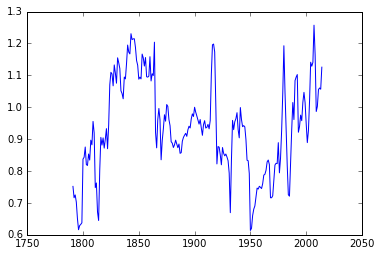

In [24]:
dates = range(1791,2015)
rer = list()
for yr in dates:
    rer.append( gbpusd[yr] * ukrpi[yr] / uscpi[yr] / rer1900)

fig, ax = plt.subplots(1,1)
ax.plot(dates,rer);

In [27]:
import statsmodels
import statsmodels.tsa.stattools as ts

results = ts.adfuller(rer,maxlag=5, store=True)

print("t-rate={}".format(results[-1].adfstat))
print(results[-1].critvalues)
print results[-1].resols.summary()

t-rate=-3.87896916298
{'5%': -2.874648939216792, '1%': -3.4601541637510409, '10%': -2.5737567259151044}
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     9.079
Date:                Tue, 29 Mar 2016   Prob (F-statistic):           0.000163
Time:                        18:54:31   Log-Likelihood:                 304.79
No. Observations:                 222   AIC:                            -603.6
Df Residuals:                     219   BIC:                            -593.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------

Therefore reject null hypothesis of unit root. Therefore evidence of LR real exchange rate.